# Exploratory Data Analysis
Flows and Code references : <br>
https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9

# Import Library
-------

In [1]:
# Import library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn') # Use seaborn style

# Input Dataset
--------

Saya menemukan _non-standard missing value_ (_value_ yang selain data kosong dan NaN) yaitu "?". Maka dari itu di awal proses, perlu menentukan nilai apa saja yang dianggap _Missing Value_. Ref : https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

In [2]:
# Input dataset
# input -> Dataframe

# url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

missing_values = ["n/a", "na", "--", "", "?"] # Determine the missing value
df = pd.read_csv(url,na_values = missing_values, header=None) # Initialization dataset

In [3]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'] # Add df columns

# General Overview
Melihat data secara umum | disini saya pakai fungsi ***head()*** ,***tail()*** ,***info()***, ***describe()***

-----------

In [4]:
df.head() # 5 first row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.tail() # 5 last row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [6]:
df.info() # General info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Dataset ini mengandung **303 baris data** dengan **14 Kolom**. Sbanyak 13 kolom merupakan fitur dan kolom "num" merupakan label. Semua kolom fitur bertipe **float** dan kolom label bertipe **integer**

In [7]:
df.describe() # Descriptif statistic

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# Data cleaning
check missing value, Check duplicate value, check data type, check outlier, check typo, check imbalance data

---

### -- Check missing value

In [8]:
# Check missing value

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [9]:
# Preview rows contain missing value

if df.isnull().any(axis=None):
    print("Preview of data with null values")
    print("Null values : ", df.isnull().sum().sum())
    display(df[df.isnull().any(axis=1)])

Preview of data with null values
Null values :  6


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [10]:
# Replace missing value with median value

df = df.fillna(df.median())

Metode yang dipilih untuk mengatasi missing value adalah dengan median. <br>
Alasan: Kolom yang memiliki _missing value_ memiliki tipe data categorical.

In [11]:
print("Null values : ",df.isnull().sum().sum())
print("Shape of data: ", df.shape)

Null values :  0
Shape of data:  (303, 14)


Dengan metode replace dapat mengatasi missing value tanpa mengurangi data

### -- Check duplicate

In [12]:
# Check duplicate data

print("Data duplicated: ", df.duplicated().sum())

Data duplicated:  0


### -- Correction label

> The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value0).

Tujuan dari eksperimen data ini ada membedakan antara nilai(1,2,3,4) dengan 0. Maka model  ML menjadi **model binary classification**. Angka(1,2,3,4) dalam kolom **num** akan dikelompokan menjadi 1 (mempunyai penyakit jantung)

In [13]:
df['num_binary'] = df['num'].mask(df['num'] > 0, 1)

In [14]:
df['num_binary'].unique()

array([0, 1], dtype=int64)

### -- Check imbalance data

0    164
1    139
Name: num_binary, dtype: int64


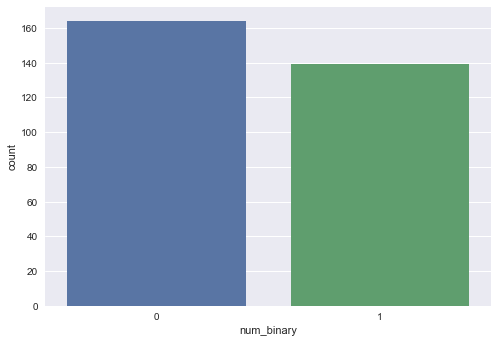

In [15]:
# Check imbalance dataset
import seaborn as sns

sns.countplot(x=df['num_binary'])
print(df['num_binary'].value_counts())

### -- Check Data type
Menyesuaikan tipe data sesuai dengan metadata yang diberikan <br>
**Binary** (sex, fbs, restceg, exang) <br>
**Categorik** (ca, cp, slope, thal) <br>
**Numeric** (trestbps, chol, thalach, oldpeak,age)

In [16]:
# Pisah antara fitur dan label

feature = df.iloc[:,:13]
label = df['num_binary']

print(feature.shape)
print(label.shape)

(303, 13)
(303,)


In [17]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
dtypes: float64(13)
memory usage: 30.9 KB


In [18]:
columns_cat = ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

feature[columns_cat] = feature[columns_cat].astype('category')

In [19]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    category
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
dtypes: category(9), float64(4)
memory usage: 14.8 KB


### -- Check outlier
Cek nilai outlier pada data numerik

In [20]:
features_num = feature.drop(columns=(columns_cat))

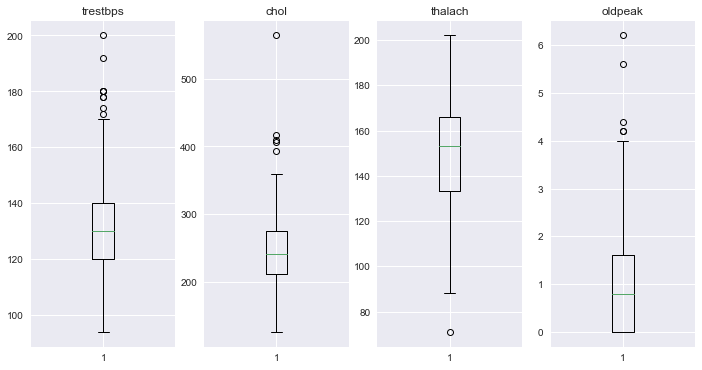

In [21]:
# Check univariate outlier data using boxplot

k = 0
plt.figure(figsize=(15, 6))
for i in features_num.columns:
    plt.subplot(1,5,k+1)
    plt.boxplot(features_num[i])
    plt.title(i)
    k+=1

Data terindikasi **outlier**

In [22]:
# Count data outlier every column

Q1 = features_num.quantile(0.25)
Q3 = features_num.quantile(0.75)
IQR = Q3 - Q1

((features_num < (Q1 - 1.5 * IQR)) | (features_num > (Q3 + 1.5 * IQR))).sum()

trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

References : https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-python

In [23]:
# Winsorize method

def winsorize(columns):
    
    Q1 = features_num[columns].quantile(0.25)
    Q3 = features_num[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_treshold = (features_num[columns] < (Q1 - 1.5 * IQR)).any()
    upper_treshold = (features_num[columns] > (Q3 + 1.5 * IQR)).any()
    
    if lower_treshold:
        features_num[columns] = features_num[columns].mask(features_num[columns] < (Q1 - 1.5 * IQR), Q1)
    
    if upper_treshold:
         features_num[columns] = features_num[columns].mask(features_num[columns] > (Q3 + 1.5 * IQR), Q3)

    return features_num[columns]

Handling outlier data menggunakan metode Winsorize. Dengan winorizing, nilai variabel apa pun di atas atau di bawah persentil k di setiap sisi distribusi variabel diganti dengan nilai persentil ke-k itu sendiri. Dengan metode winsorize keutuhan data akan terjaga dan metode ini masih merupakan rekomendasi untuk mengatasi outlier. <br>
References : https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0

In [24]:
# Applying winsorize

for i in features_num.columns:
    features_num[i] = winsorize(i)

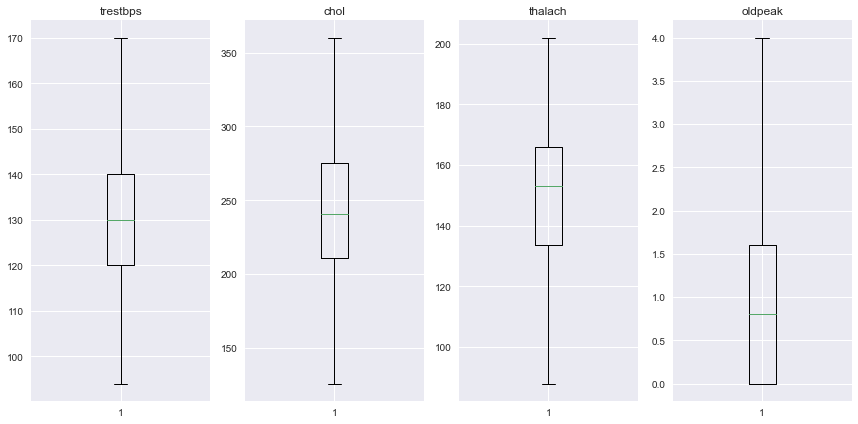

In [25]:
# Check univariate outlier data using boxplot

k = 0
plt.figure(figsize=(15, 6))
for i in features_num.columns:
    plt.subplot(1,5,k+1)
    plt.boxplot(features_num[i])
    plt.title(i)
    plt.tight_layout()
    k+=1

### -- Check typo

In [26]:
for i in df.columns:
    print(i)
    print(df[i].unique())

age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex
[1. 0.]
cp
[1. 4. 3. 2.]
trestbps
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
chol
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 56

# Distribution and Relationship
a) Categorical variable distribution<br>
b) Continuous variable distribution<br>
c) Relationship between categorical and continuous variables

In [27]:
features_cat = feature[columns_cat]

### -- Categorical variable distribution

In [28]:
features_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age      303 non-null    category
 1   sex      303 non-null    category
 2   cp       303 non-null    category
 3   fbs      303 non-null    category
 4   restecg  303 non-null    category
 5   exang    303 non-null    category
 6   slope    303 non-null    category
 7   thal     303 non-null    category
 8   ca       303 non-null    category
dtypes: category(9)
memory usage: 5.3 KB


In [29]:
# Create for plotting function

def bar_plot(width,height):
    
    chart = sns.barplot(x=width, y=height)
    
    totals = []
    for p in chart.patches:
        totals.append(p.get_height())
    
    total=sum(totals)
    
    for p in chart.patches:
        value = (p.get_height()/total)*100
        chart.annotate(f'{value:1.1f}%',
                       xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                       xytext=(0, 5),
                       textcoords="offset points", size=12,color="black",
                       ha='center', va='bottom')

#### Age distribution

In [30]:
data = df['age'].loc[df['num_binary']>0].value_counts(bins=[30,40,50,60,70,80]).sort_index()

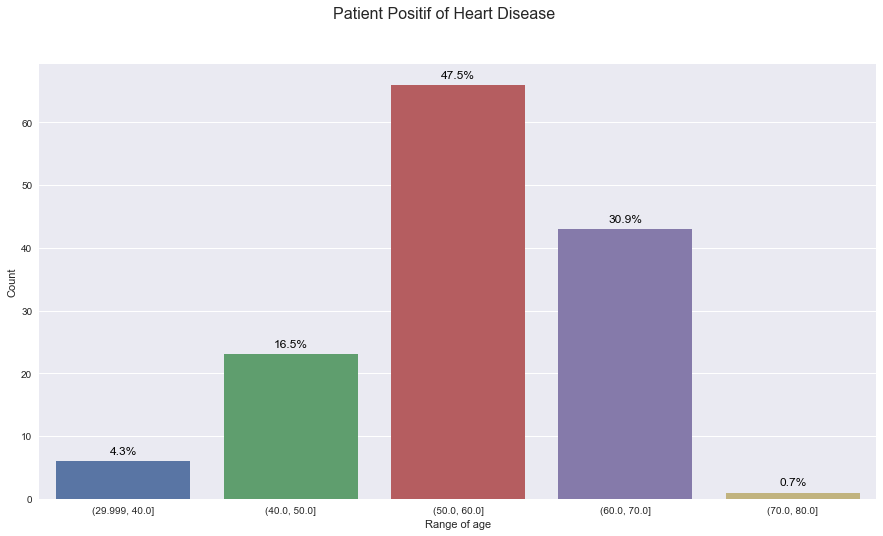

Min:  29.0
Max:  77.0
Mean:  54.43894389438944
Mode:  0    58.0
dtype: float64


In [31]:
# Barplot

plt.figure(figsize=(15,8))
plt.suptitle("Patient Positif of Heart Disease", fontsize=16)

bar_plot(data.index, data.values)
plt.xlabel("Range of age")
plt.ylabel("Count")
plt.show()

# Descriptif analysis
print("Min: ", df.age.min())
print("Max: ", df.age.max())
print("Mean: ", df.age.mean())
print("Mode: ", df.age.mode())

**Sebagian besar** pasien dengan penyakit jantung berusia **50 - 60an**. Pasien **termuda berumur 29 tahun** dan **pasien tertua berumur 77 tahun**. Usia pada rentang 40 sampai 70 tahun rentan terkena penyakit jantung dengan tingkat probabilitas sebesar **47.5%**

#### Gender Distribution

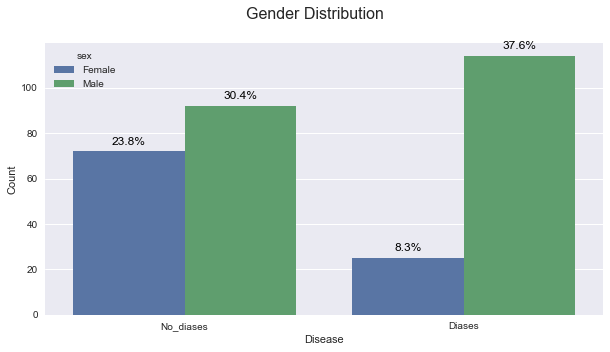

In [32]:
# plot

plt.figure(figsize=(10,5))
plt.suptitle("Gender Distribution", fontsize=16)

gender = features_cat['sex'].map({0:"Female", 1:"Male"})
diases = label.map({0:"No_diases", 1:"Diases"})

ax = sns.countplot(x=diases, hue=gender)

# annotation
totals = []
for p in ax.patches:
    totals.append(p.get_height())
    
total=sum(totals)

for p in ax.patches:
    value = (p.get_height()/total)*100
    ax.annotate(f'{value:1.1f}%',
                   xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                   xytext=(0, 5),
                   textcoords="offset points", size=12,color="black",
                   ha='center', va='bottom')
        
plt.xlabel("Disease")
plt.ylabel("Count")

plt.show()

#### Chest pain type

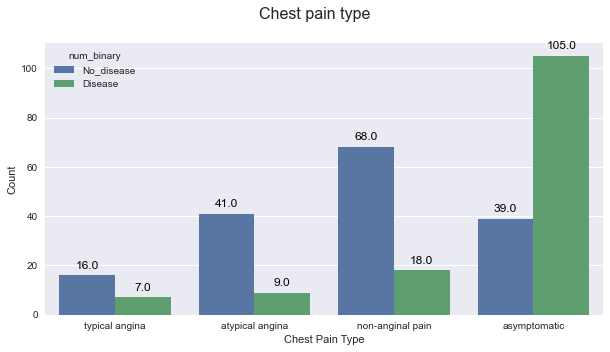

In [33]:
# plot

plt.figure(figsize=(10,5))
plt.suptitle("Chest pain type", fontsize=16)

cp = features_cat['cp'].map({1:"typical angina", 2:"atypical angina", 3:"non-anginal pain", 4:"asymptomatic"})
disease = label.map({0:"No_disease", 1:"Disease"})

ax = sns.countplot(x=cp, hue=disease)

# annotation
totals = []
for p in ax.patches:
    totals.append(p.get_height())
    
total=sum(totals)

for p in ax.patches:
    ax.annotate(f'{p.get_height():1.1f}',
                   xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                   xytext=(0, 5),
                   textcoords="offset points", size=12,color="black",
                   ha='center', va='bottom')
        
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")

plt.show()

Pada pasien penyakit jantung sebagian besar mengalami jenis nyeri dada asymtomatic

#### Fasting blood sugar

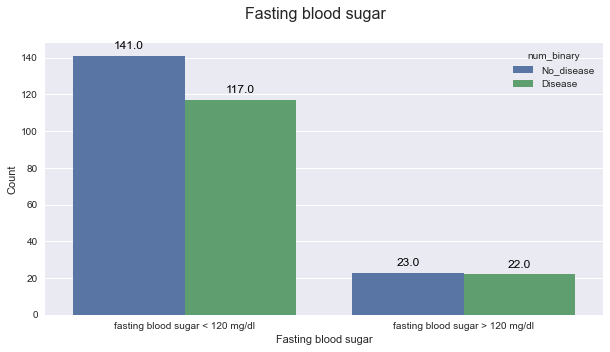

In [34]:
# plot

plt.figure(figsize=(10,5))
plt.suptitle("Fasting blood sugar", fontsize=16)

cp = features_cat['fbs'].map({1:"fasting blood sugar > 120 mg/dl", 0:"fasting blood sugar < 120 mg/dl"})
disease = label.map({0:"No_disease", 1:"Disease"})

ax = sns.countplot(x=cp, hue=disease)

# annotation
totals = []
for p in ax.patches:
    totals.append(p.get_height())
    
total=sum(totals)

for p in ax.patches:
    ax.annotate(f'{p.get_height():1.1f}',
                   xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                   xytext=(0, 5),
                   textcoords="offset points", size=12,color="black",
                   ha='center', va='bottom')
        
plt.xlabel("Fasting blood sugar")
plt.ylabel("Count")

plt.show()

#### Resting electrocardiographic results

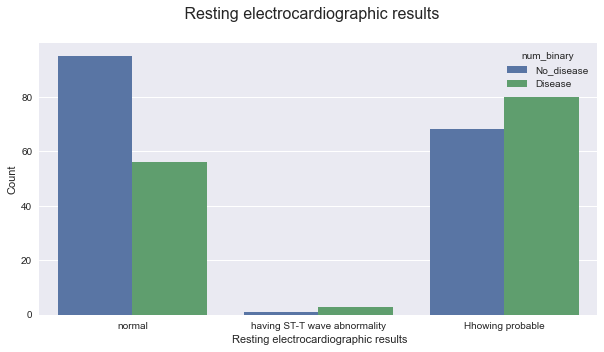

In [35]:
# plot

plt.figure(figsize=(10,5))
plt.suptitle(" Resting electrocardiographic results", fontsize=16)

cp = features_cat['restecg'].map({0:"normal", 1:"having ST-T wave abnormality", 2:"Hhowing probable"})
disease = label.map({0:"No_disease", 1:"Disease"})

ax = sns.countplot(x=cp, hue=disease)

# annotation
# totals = []
# for p in ax.patches:
#     totals.append(p.get_height())
    
# total=sum(totals)

# for p in ax.patches:
#     ax.annotate(f'{p.get_height():1.1f}',
#                    xy=(p.get_x() + p.get_width() / 2, p.get_height()),
#                    xytext=(0, 5),
#                    textcoords="offset points", size=12,color="black",
#                    ha='center', va='bottom')
        
plt.xlabel(" Resting electrocardiographic results")
plt.ylabel("Count")

plt.show()

#### Exercise induced angina

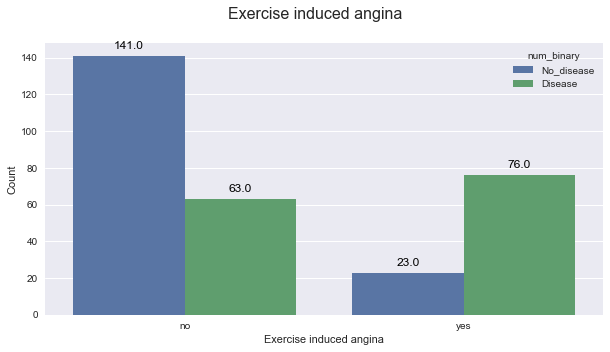

In [36]:
# plot

plt.figure(figsize=(10,5))
plt.suptitle("Exercise induced angina", fontsize=16)

cp = features_cat['exang'].map({0:"no", 1:"yes"})
disease = label.map({0:"No_disease", 1:"Disease"})

ax = sns.countplot(x=cp, hue=disease)

# annotation
totals = []
for p in ax.patches:
    totals.append(p.get_height())
    
total=sum(totals)

for p in ax.patches:
    ax.annotate(f'{p.get_height():1.1f}',
                   xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                   xytext=(0, 5),
                   textcoords="offset points", size=12,color="black",
                   ha='center', va='bottom')
        
plt.xlabel("Exercise induced angina")
plt.ylabel("Count")

plt.show()

#### The slope of the peak exercise ST segment

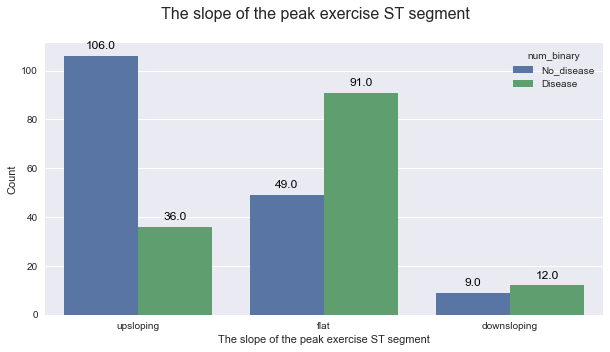

In [37]:
# plot

plt.figure(figsize=(10,5))
plt.suptitle("The slope of the peak exercise ST segment", fontsize=16)

cp = features_cat['slope'].map({1:"upsloping", 2:"flat", 3:"downsloping"})
disease = label.map({0:"No_disease", 1:"Disease"})

ax = sns.countplot(x=cp, hue=disease)

# annotation
totals = []
for p in ax.patches:
    totals.append(p.get_height())
    
total=sum(totals)

for p in ax.patches:
    ax.annotate(f'{p.get_height():1.1f}',
                   xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                   xytext=(0, 5),
                   textcoords="offset points", size=12,color="black",
                   ha='center', va='bottom')
        
plt.xlabel("The slope of the peak exercise ST segment")
plt.ylabel("Count")

plt.show()

#### Thal

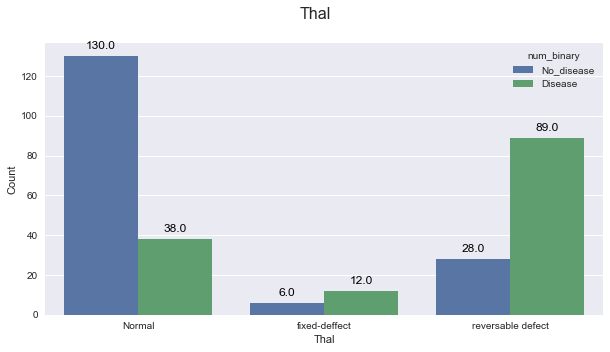

In [38]:
# plot

plt.figure(figsize=(10,5))
plt.suptitle("Thal", fontsize=16)

cp = features_cat['thal'].map({3:"Normal", 6:"fixed-deffect", 7:"reversable defect"})
disease = label.map({0:"No_disease", 1:"Disease"})

ax = sns.countplot(x=cp, hue=disease)

# annotation
totals = []
for p in ax.patches:
    totals.append(p.get_height())
    
total=sum(totals)

for p in ax.patches:
    ax.annotate(f'{p.get_height():1.1f}',
                   xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                   xytext=(0, 5),
                   textcoords="offset points", size=12,color="black",
                   ha='center', va='bottom')
        
plt.xlabel("Thal")
plt.ylabel("Count")

plt.show()

#### number of major vessels

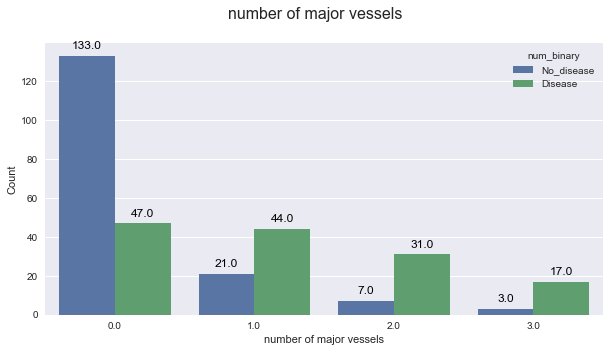

In [39]:
# plot

plt.figure(figsize=(10,5))
plt.suptitle("number of major vessels", fontsize=16)

cp = features_cat['ca']
disease = label.map({0:"No_disease", 1:"Disease"})

ax = sns.countplot(x=cp, hue=disease)

# annotation
totals = []
for p in ax.patches:
    totals.append(p.get_height())
    
total=sum(totals)

for p in ax.patches:
    ax.annotate(f'{p.get_height():1.1f}',
                   xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                   xytext=(0, 5),
                   textcoords="offset points", size=12,color="black",
                   ha='center', va='bottom')
        
plt.xlabel("number of major vessels")
plt.ylabel("Count")

plt.show()

### -- Numerical variable distribution

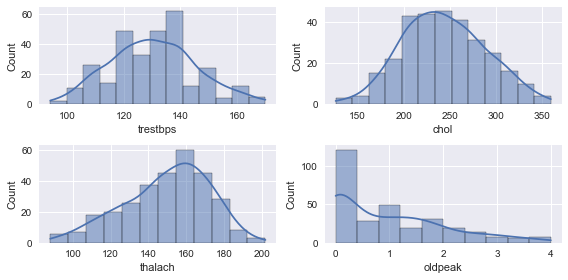

In [40]:
# Check distribution of data

k=0
for i in features_num.columns:
    plot_no = 320 + (k+1)
    plt.subplot(plot_no)
    sns.histplot(features_num[i], kde=True)
    k+=1
    plt.tight_layout()

### -- Relationship between categorical and continuous variables

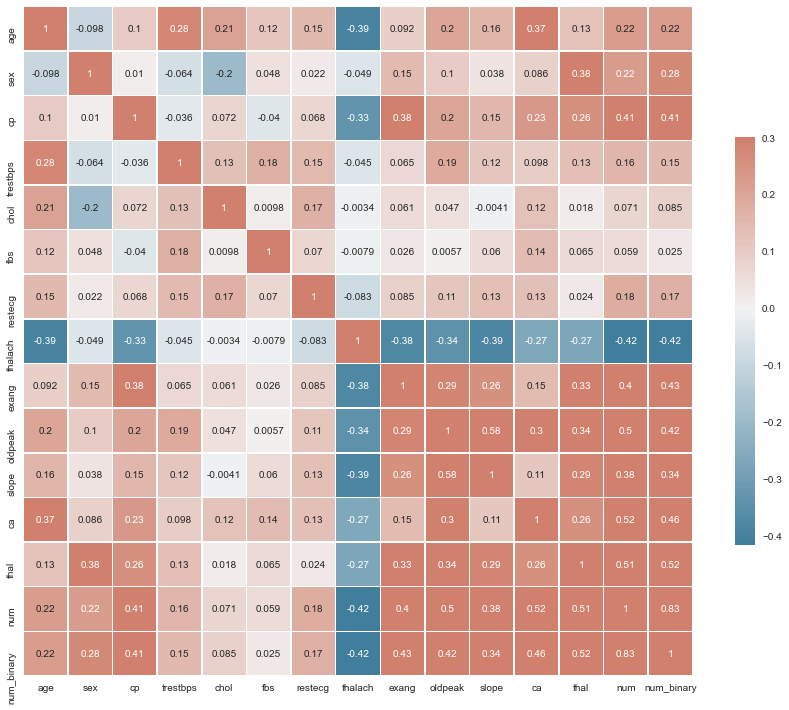

In [41]:
corr = df.corr()

plt.figure(figsize=(15,15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

**Korelasi positif** tertinggi terhadap **label** adalah variabel **tha**l dan **korelasi negatif tertinggi** terhadap **label** adalah variabel **thalach**. Sedangkan variabel dengan **orelasi terenda**h terhadap **label** adalah variabel **fbs**

In [42]:
# Pairplot

data = pd.concat([features_num, label], axis=1)

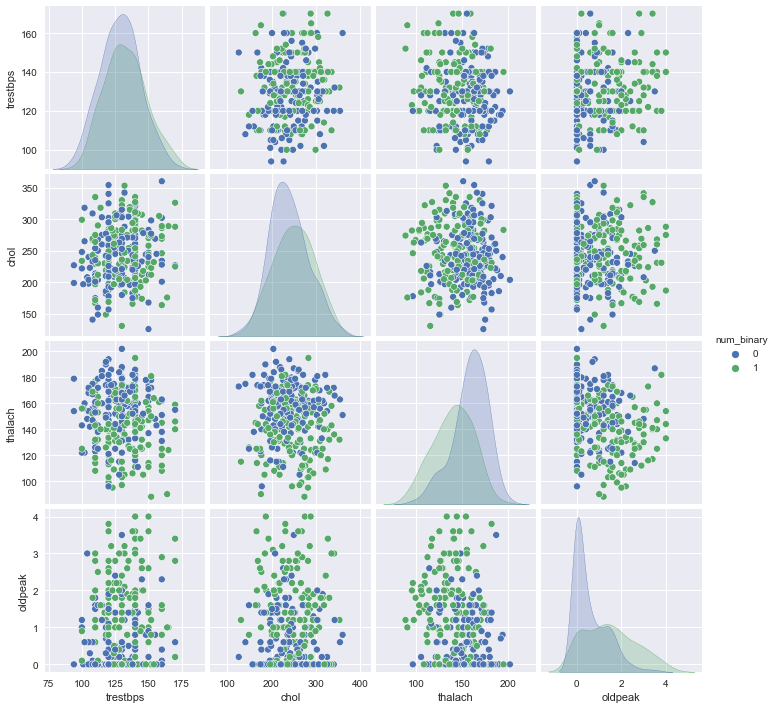

In [43]:
sns.pairplot(data, hue="num_binary")

In [44]:
# Combine all columns and save into new dataset

# binary class
data_binary = pd.concat([features_num, features_cat, label], axis=1)
data_binary

,trestbps,chol,thalach,oldpeak,age,sex,cp,fbs,restecg,exang,slope,thal,ca,num_binary
0,145.0,233.0,150.0,2.3,63.0,1.0,1.0,1.0,2.0,0.0,3.0,6.0,0.0,0
1,160.0,286.0,108.0,1.5,67.0,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0,1
2,120.0,229.0,129.0,2.6,67.0,1.0,4.0,0.0,2.0,1.0,2.0,7.0,2.0,1
3,130.0,250.0,187.0,3.5,37.0,1.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0
4,130.0,204.0,172.0,1.4,41.0,0.0,2.0,0.0,2.0,0.0,1.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,110.0,264.0,132.0,1.2,45.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0,1
299,144.0,193.0,141.0,3.4,68.0,1.0,4.0,1.0,0.0,0.0,2.0,7.0,2.0,1
300,130.0,131.0,115.0,1.2,57.0,1.0,4.0,0.0,0.0,1.0,2.0,7.0,1.0,1
301,130.0,236.0,174.0,0.0,57.0,0.0,2.0,0.0,2.0,0.0,2.0,3.0,1.0,1


In [46]:
# Save data into csv

data_binary.to_csv('data_binary.csv', index=False, header=True) # for binary class